In [1]:
sample_url = "https://preview.redd.it/hhzg3z2ky0s31.gif?format=png8&s=2465ba84c3bbac73d0588a225d819579aaaba4a7"

## Visually See Raw Image

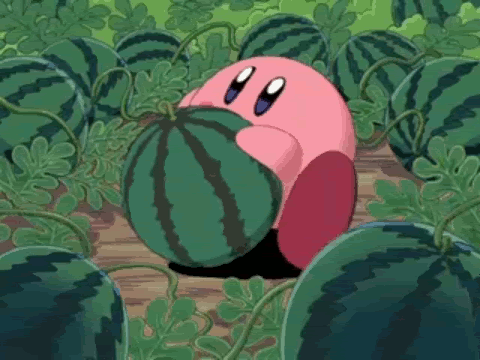

In [2]:
from PIL import Image
import requests
from io import BytesIO

response = requests.get(sample_url)
img = Image.open(BytesIO(response.content))
img

## Load a SINGLE Image (from url) Into Array of Specified Size

In [3]:
import numpy as np
import urllib
import cv2

def image_url_to_array(url, width=28, height=28):
# check for possible errors (e.g. 404)
    try:
        # request the image and convert to a numpy array
        res = urllib.request.urlopen(url)
        img = np.asarray(bytearray(res.read()), dtype="uint8")
        img = cv2.imdecode(img, cv2.IMREAD_GRAYSCALE) #IMREAD_COLOR if color is important information
        img = cv2.resize(img, (width, height))
    except:
        img = 'an error occured'
    return img

In [4]:
image_url_to_array(sample_url)
#image_url_to_array(sample_url, 50, 50)

array([[134,  94,  98,  69, 103,  95, 138, 105, 106, 140, 105,  94, 121,
        105, 104, 156, 140, 140, 103, 110, 140, 140, 140,  53,  45,  62,
         98, 141],
       [103,  96,  92,  72, 103,  95, 102,  88, 106, 140, 106, 106, 138,
        140, 141, 108,  62,  54, 103, 103, 106, 140, 138,  55, 150,  76,
        111, 137],
       [ 90,  96, 104,  96, 106, 137, 138,  97,  93, 117, 126,  96, 128,
        103,  99,  71,  65,  48,  56,  93, 122, 116,  73, 138, 139, 103,
         96, 101],
       [147, 101,  90,  98,  50,  97, 136,  45,  98,  98,  68,  90, 103,
         78,  73,  50,  98,  58,  93, 103, 101,  99,  55,  52, 111, 100,
         93, 106],
       [105, 138,  86,  89,  98,  49,  98,  84,  47,  74,  46, 103, 101,
        124,  91, 173, 145, 106,  50,  93,  53,  49,  86,  50,  68,  85,
        135, 112],
       [ 46,  39,  64, 114,  98,  50, 103, 102,  79, 111, 103, 103, 109,
        187, 246, 188, 187, 188, 102,  44,  50, 123,  94,  87,  47,  99,
         53,  68],
       [ 9

## Visualize the Image Array

larger img_size -> more pixels -> larger array -> more information -> higher quality image

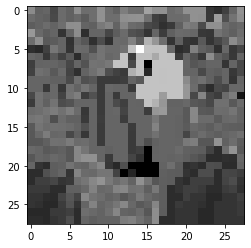

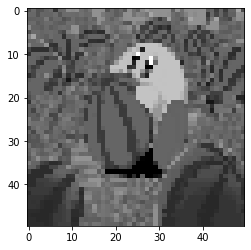

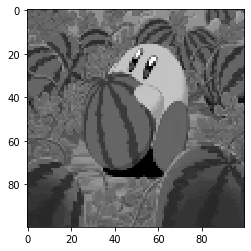

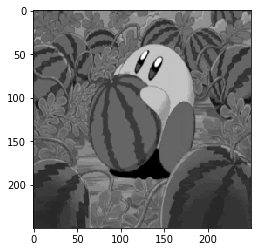

In [6]:
import matplotlib.pyplot as plt
#to visually see how the computer reads the image array - color mapping just adjusts how it's 
#displayed on the monitor, doesn't change the values of the array
#wide variety of various color mappings
#https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
plt.imshow(image_url_to_array(sample_url), cmap='gray')
plt.show()
plt.imshow(image_url_to_array(sample_url, 50, 50), cmap='gray')
plt.show()
plt.imshow(image_url_to_array(sample_url, 100, 100), cmap='gray')
plt.show()
plt.imshow(image_url_to_array(sample_url, 250,250 ), cmap='gray')
plt.show()

## Load MANY Images (from urls) Into numpy.ndarray of Specified Size

In [8]:
#requires the image_url_to_array() function from above ^

def bulk_image_url_to_array(url_list, width=28, height=28):
    ndim_array = np.zeros((0, width, height )) #blank, numpy.ndarray template
    for i in url_list:
        try:
            reshape = np.reshape(image_url_to_array(i, width, height), (1,width ,height)) #reshape each individual image to match the template
            ndim_array = np.append(ndim_array, reshape, axis=0)
        except:
            pass 
    ndim_array = ndim_array.astype(np.uint8) #convert to type uint8
    return ndim_array

In [9]:
sample_url_list = ["https://i.pinimg.com/originals/a4/90/47/a49047d73e5644961b123aa48790d5c8.jpg",
                  "https://www.sciencemag.org/sites/default/files/styles/article_main_large/public/cc_iStock-478639870_16x9.jpg?itok=1-jMc4Xv",
                  "https://lithub.com/wp-content/uploads/2019/09/octopus-1.jpg"]

#bulk_image_url_to_array(sample_url_list)
bulk_image_url_to_array(sample_url_list, 250, 250)
#if url list is a column from a datframe, will need to add a flag in the dataframe in except
#in case there are errors with some of the urls, you'll know which ones were skipped over and how
#to align images with proper labels

array([[[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       [[110, 172, 160, ...,   1,  14,  13],
        [197, 130, 155, ...,   7,  11,  14],
        [225, 212, 113, ...,  25,  47, 113],
        ...,
        [ 49, 147,  67, ...,  99, 115, 101],
        [ 29, 151,  81, ..., 133,  72,  74],
        [105, 147,   8, ..., 145, 109, 108]],

       [[  8,   8,   9, ...,  13,  13,  13],
        [  8,   8,   9, ...,  13,  13,  13],
        [  8,   8,   9, ...,  13,  13,  13],
        ...,
        [  7,   7,   7, ...,  10,  10,  10],
        [  7,   7,   7, ...,  10,  10,  10],
        [  7,   7,   7, ...,  10,  10,  10]]], dtype=uint8)

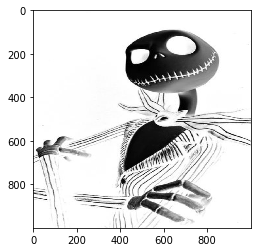

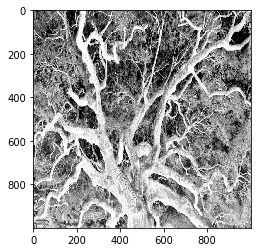

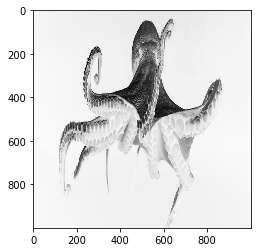

In [10]:
for i in range(len(sample_url_list)):
    plt.imshow(bulk_image_url_to_array(sample_url_list, 1000, 1000)[i], cmap = 'gist_yarg')
    plt.show()

## More info on array sizes:

In [11]:
import tensorflow as tf
tf.__version__

mnist = tf.keras.datasets.mnist #images of hand-written digits, each a 28x28 array
(x_train, y_train), (x_test, y_test) = mnist.load_data() #x is the images, y is what number is should be (answer key)
x_train.shape
#(records, width, height)
type(y_train)
y_train#.shape

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [12]:
#for example...

def samplefunction1(url):
# download the image, convert it to a NumPy array, and then read it into OpenCV format
    resp = urllib.request.urlopen(url)
    image = np.asarray(bytearray(resp.read()), dtype="uint8")
    image = cv2.imdecode(image, cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, (2, 5)) #adjust image dimension

    return image

def samplefunction2(url):
# download the image, convert it to a NumPy array, and then read it into OpenCV format
    resp = urllib.request.urlopen(url)
    image = np.asarray(bytearray(resp.read()), dtype="uint8")
    image = cv2.imdecode(image, cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, (5, 2)) #adjust image dimension

    return image

samplefunction1(sample_url)

array([[ 90,  94],
       [ 61,  87],
       [ 88, 142],
       [130,  90],
       [ 47,  50]], dtype=uint8)

In [13]:
samplefunction2(sample_url)

array([[ 98, 107,   7, 132,  71],
       [ 43, 136,   0,  86,  43]], dtype=uint8)

## Converting List of Lables into numpy.ndarray

In [14]:
import numpy as np
#np.zeros((1)).shape this is the shape we want our list to transform into
labels = ["jack", "tree", "octopus"]
labels = np.array(labels)
labels

array(['jack', 'tree', 'octopus'], dtype='<U7')

## Splitting to Train/Validation

In [15]:
from sklearn.model_selection import train_test_split

sample_url_list = ["https://i.pinimg.com/originals/a4/90/47/a49047d73e5644961b123aa48790d5c8.jpg",
                  "https://www.sciencemag.org/sites/default/files/styles/article_main_large/public/cc_iStock-478639870_16x9.jpg?itok=1-jMc4Xv",
                  "https://lithub.com/wp-content/uploads/2019/09/octopus-1.jpg"]

x = bulk_image_url_to_array(sample_url_list, 250, 250)
y = np.array(["jack", "tree", "octopus"])

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 0.33) #33% for validation, 67% for training

[[[110 172 160 ...   1  14  13]
  [197 130 155 ...   7  11  14]
  [225 212 113 ...  25  47 113]
  ...
  [ 49 147  67 ...  99 115 101]
  [ 29 151  81 ... 133  72  74]
  [105 147   8 ... 145 109 108]]

 [[  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  ...
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]]]
['tree' 'jack']


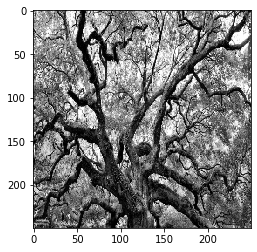

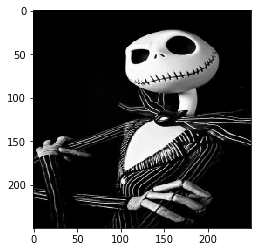

In [16]:
print(x_train)
print(y_train)
#verify image and label align
for i in range(len(x_train)):
    plt.imshow(x_train[i], cmap = 'gray')
    plt.show()

[[[ 8  8  9 ... 13 13 13]
  [ 8  8  9 ... 13 13 13]
  [ 8  8  9 ... 13 13 13]
  ...
  [ 7  7  7 ... 10 10 10]
  [ 7  7  7 ... 10 10 10]
  [ 7  7  7 ... 10 10 10]]]
['octopus']


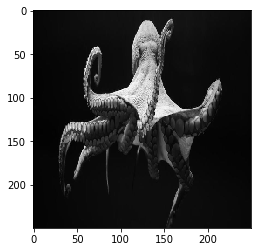

In [17]:
print(x_val)
print(y_val)
#verify image and label align
for i in range(len(x_val)):
    plt.imshow(x_val[i], cmap = 'gray')
    plt.show()